### Домашнее задание


1. Скачать любой понравившийся вам датасет с UCI repository(можете даже свой какой-то взять) и сразу же разделите его на тренировочную и тестовую выборки. Тестовую выборку сохраните на диск и больше не трогайте. 
2. Провести EDA (exploratory data analysis: histograms, boxplots - visualization, etc). Например
3. Сделать feature engineering. При этом постарайтесь «завернуть» ваш код для преобразования данных в классы или функции (пример Transformer как в ноутбуке). 
4. Обучить базовую модель (любую - на ваш выбор). При этом нужно использовать cross validation
5. Посчитайте разные метрики качества на cross-validation, отрисуйте графики (roc auc)
6. Сделать подбор гиперпараметров с помощью той же самой cross-validation. 
7. Сохраните вашу модель на диск
8. [в отдельном ноутбуке!] Загрузите ваш отложенный на шаге 1 датасет и сохраненные ранее файлы и сделайте прогноз моделью. 
9. Посчитайте метрики качества и сделайте выводы о том, насколько прогнозы (качество) на «новых» данных отличаются от того, что вы видели на cross-validation. Если будут очень серьезные отличия, то подумайте, где вы ошиблись и как это можно поправить.
10. Бонусный вопрос: у вас есть на выбор два варианта разделения вашего исходного датасета - на train/test и на train/test/val. Подумайте, в каких ситуациях предпочтительнее один или второй вариант либо всегда лучше какой-то один? Какой бы выбрали вы?

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
%matplotlib inline

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

C:\Users\sych_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()

In [3]:
iris_frame = pd.DataFrame(iris.data)
# обозначение колонок и целевых переменных
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

In [4]:
print(iris_frame.shape)
print ("Rows     : " ,iris_frame.shape[0])
print ("Columns  : " ,iris_frame.shape[1])
print ("\nFeatures : \n" ,iris_frame.columns.tolist())
print ("\nMissing values :  ", iris_frame.isnull().sum().values.sum())
print ("\nUnique values :  \n",iris_frame.nunique())
iris_frame.head()

(150, 5)
Rows     :  150
Columns  :  5

Features : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']

Missing values :   0

Unique values :  
 sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Preprocess and feature engineering

In [5]:
#две новые фичи - площадь чашелистника и площадь лепеска
iris_frame['sepal square (cm**2)'] = iris_frame['sepal length (cm)'] * iris_frame['sepal width (cm)']  
iris_frame['petal square (cm**2)'] = iris_frame['petal length (cm)'] * iris_frame['petal width (cm)']  
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal square (cm**2),petal square (cm**2)
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28


### EDA

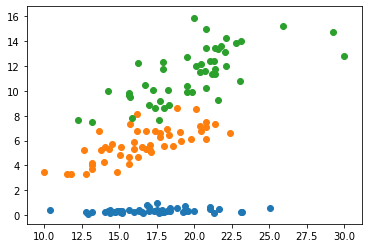

In [6]:
plt.scatter(iris_frame[iris_frame['target']==0]['sepal square (cm**2)'], iris_frame[iris_frame['target']==0]['petal square (cm**2)'])
plt.scatter(iris_frame[iris_frame['target']==1]['sepal square (cm**2)'], iris_frame[iris_frame['target']==1]['petal square (cm**2)'])
plt.scatter(iris_frame[iris_frame['target']==2]['sepal square (cm**2)'], iris_frame[iris_frame['target']==2]['petal square (cm**2)'])
plt.show()

### Creating a holdout dataset (test)

Создадим отложенную выборку, которую мы не будем трогать до самого конца

In [7]:
#features = ['sepal square (cm**2)', 'petal square (cm**2)']
#target = 'target'

X_train, X_test, y_train, y_test = train_test_split(iris_frame[['sepal square (cm**2)','petal square (cm**2)']], 
                                                    iris_frame['target'], test_size=0.3, random_state=42)
#save test
X_test.to_csv("X_test.csv", index=None)
y_test.to_csv("y_test.csv", index=None)
#save train
X_train.to_csv("X_train.csv", index=None)
y_train.to_csv("y_train.csv", index=None)
X_train.head()

C:\Users\sych_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\sych_\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


,sepal square (cm**2),petal square (cm**2)
81,13.20,3.70
133,17.64,7.65
137,19.84,9.90
75,19.80,6.16
109,25.92,15.25


In [8]:
X_test.shape

(45, 2)

In [9]:
X_train.shape

(105, 2)

### sklearn Transformers

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

### Соберем наш первый пайплайн

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

sepal_square =  Pipeline([
                ('selector', NumberSelector(key='sepal square (cm**2)')),
                ('standard', RobustScaler())
            ])

petal_square =  Pipeline([
                ('selector', NumberSelector(key='petal square (cm**2)')),
                ('standard', RobustScaler())
            ])

In [12]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('sepal square (cm**2)', sepal_square), 
                      ('petal square (cm**2)', petal_square)])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

array([[-0.91101695, -0.20543478],
       [ 0.02966102,  0.22391304],
       [ 0.49576271,  0.46847826],
       [ 0.48728814,  0.06195652],
       [ 1.78389831,  1.05      ],
       [-0.20550847, -0.01413043],
       [ 1.12288136,  0.89891304],
       [-0.14830508,  0.12608696],
       [ 0.07415254, -0.57717391],
       [ 0.86016949,  0.84891304],
       [-0.38983051, -0.16195652],
       [ 0.03813559, -0.57717391],
       [ 0.        , -0.56521739],
       [ 0.39830508, -0.525     ],
       [-1.58898305, -0.22717391],
       [-0.10381356,  0.35108696],
       [-0.25      , -0.56630435],
       [-0.52966102, -0.57282609],
       [-0.14194915, -0.51521739],
       [-0.50423729, -0.01413043],
       [-0.03389831, -0.575     ],
       [-0.08474576, -0.05978261],
       [ 2.49152542,  0.99456522],
       [-0.58898305, -0.57717391],
       [ 0.10169492,  0.        ],
       [-0.68855932,  0.47934783],
       [ 1.18644068, -0.57717391],
       [ 0.1059322 ,  0.33152174],
       [-0.38983051,

Теперь у нас есть один объект, который умеет преобразовывать наши данные

In [13]:
from sklearn import svm
svc = svm.SVC()

pipeline = Pipeline([
    ('features',feats),
    ('classifier', svc),
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
np.mean(preds == y_test)

1.0

### А теперь давайте перейдем к кроссвалидации

In [14]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'classifier', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__sepal square (cm**2)', 'features__petal square (cm**2)', 'features__sepal square (cm**2)__memory', 'features__sepal square (cm**2)__steps', 'features__sepal square (cm**2)__verbose', 'features__sepal square (cm**2)__selector', 'features__sepal square (cm**2)__standard', 'features__sepal square (cm**2)__selector__key', 'features__sepal square (cm**2)__standard__copy', 'features__sepal square (cm**2)__standard__quantile_range', 'features__sepal square (cm**2)__standard__with_centering', 'features__sepal square (cm**2)__standard__with_scaling', 'features__petal square (cm**2)__memory', 'features__petal square (cm**2)__steps', 'features__petal square (cm**2)__verbose', 'features__petal square (cm**2)__selector', 'features__petal square (cm**2)__standard', 'features__petal square (cm**2)__selector__key', 'featur

In [15]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'classifier__kernel': ['linear', 'rbf'],
                    'classifier__C': [1, 10, 100]
                  }

clf = GridSearchCV(pipeline, hyperparameters, cv=3)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('sepal '
                                                                        'square '
                                                                        '(cm**2)',
                                                                        Pipeline(steps=[('selector',
                                                                                         NumberSelector(key='sepal '
                                                                                                            'square '
                                                                                                            '(cm**2)')),
                                                                                        ('standard',
                                                                                         RobustScaler())])),
                

In [16]:
clf.best_params_

{'classifier__C': 10, 'classifier__kernel': 'linear'}

In [17]:
#refitting on entire training data using best settings
clf.refit

preds = clf.predict(X_test)
#probs = clf.predict_proba(X_test)

np.mean(preds == y_test)

1.0

Построим отчет и сохраним наш пайплайн для будущего использования

In [18]:
print ("\n Classification report : \n",classification_report(y_test,preds))
print ("Accuracy   Score : ",accuracy_score(y_test,preds))
#confusion matrix
conf_matrix = confusion_matrix(y_test,preds)


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy   Score :  1.0


In [19]:
import dill

In [20]:
with open("model_trained_svm.dill", "wb") as f:
    dill.dump(pipeline, f)